In [1]:
#imprtoring pytorch and device agnostic code 
import torch 
from torch import nn

torch.__version__

'2.6.0+cu126'

In [3]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
#get data 
#food101 (pizza steak sushi used here , along with 10% of images)

import requests
import zipfile 
from pathlib import Path
data_path = Path(r"C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata")
image_path=data_path/ "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path}directory exists")
else:
    print(f"DNE , creating one ")
    image_path.mkdir(parents=True, exist_ok=True)

#download
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    # Use the raw file URL for direct download
    request = requests.get("https://github.com/LadakaTayaara/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("downloading pizza,steak and sushi data")
    f.write(request.content)

#unzip the file
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("unzipping ")
    zip_ref.extractall(image_path)

C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushidirectory exists
downloading pizza,steak and sushi data
unzipping 


In [7]:
import os 
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

walk_through_dir(image_path)

there are 2 directories and 0 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi'
there are 3 directories and 0 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test'
there are 0 directories and 25 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\pizza'
there are 0 directories and 19 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\steak'
there are 0 directories and 31 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\sushi'
there are 3 directories and 0 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\train'
there are 0 directories and 78 images in 'C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\train\pizza'
there are

In [9]:
#setup train and testing paths 
train_dir=image_path/"train"
test_dir=image_path/"test"

train_dir,test_dir

(WindowsPath('C:/Users/Abhinandan Singh/Desktop/AI & ML/pythonpract/mynotebooks/mydata/pizza_steak_sushi/train'),
 WindowsPath('C:/Users/Abhinandan Singh/Desktop/AI & ML/pythonpract/mynotebooks/mydata/pizza_steak_sushi/test'))

C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\pizza\416067.jpg
pizza
Random image path: C:\Users\Abhinandan Singh\Desktop\AI & ML\pythonpract\mynotebooks\mydata\pizza_steak_sushi\test\pizza\416067.jpg
Image class: pizza
Image height: 512
Image width: 512


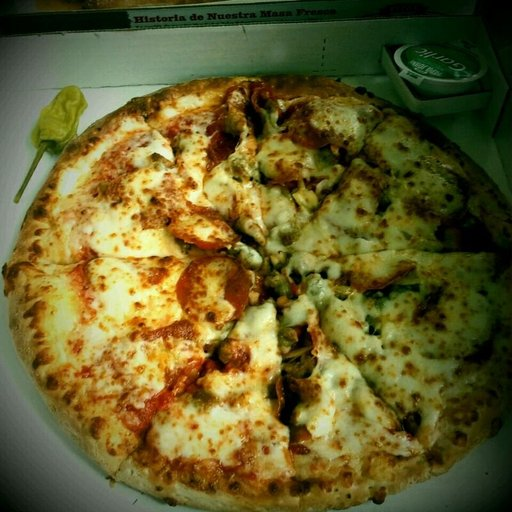

In [46]:
#visualizing the image
import random
from PIL import Image

random.seed(69)

#get all image paths 
image_path_list = list(image_path.glob("*/*/*.jpg"))  # fetches every path and puts it all together in a list

#pick a random image path 
random_image_path= random.choice(image_path_list)
print(random_image_path)

#get image class from path name (name of the folder/directory)
image_class=random_image_path.parent.stem
print(image_class)

#4.open image
img=Image.open(random_image_path)

#5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img